In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
# Iris dataset
iris = sns.load_dataset('iris')

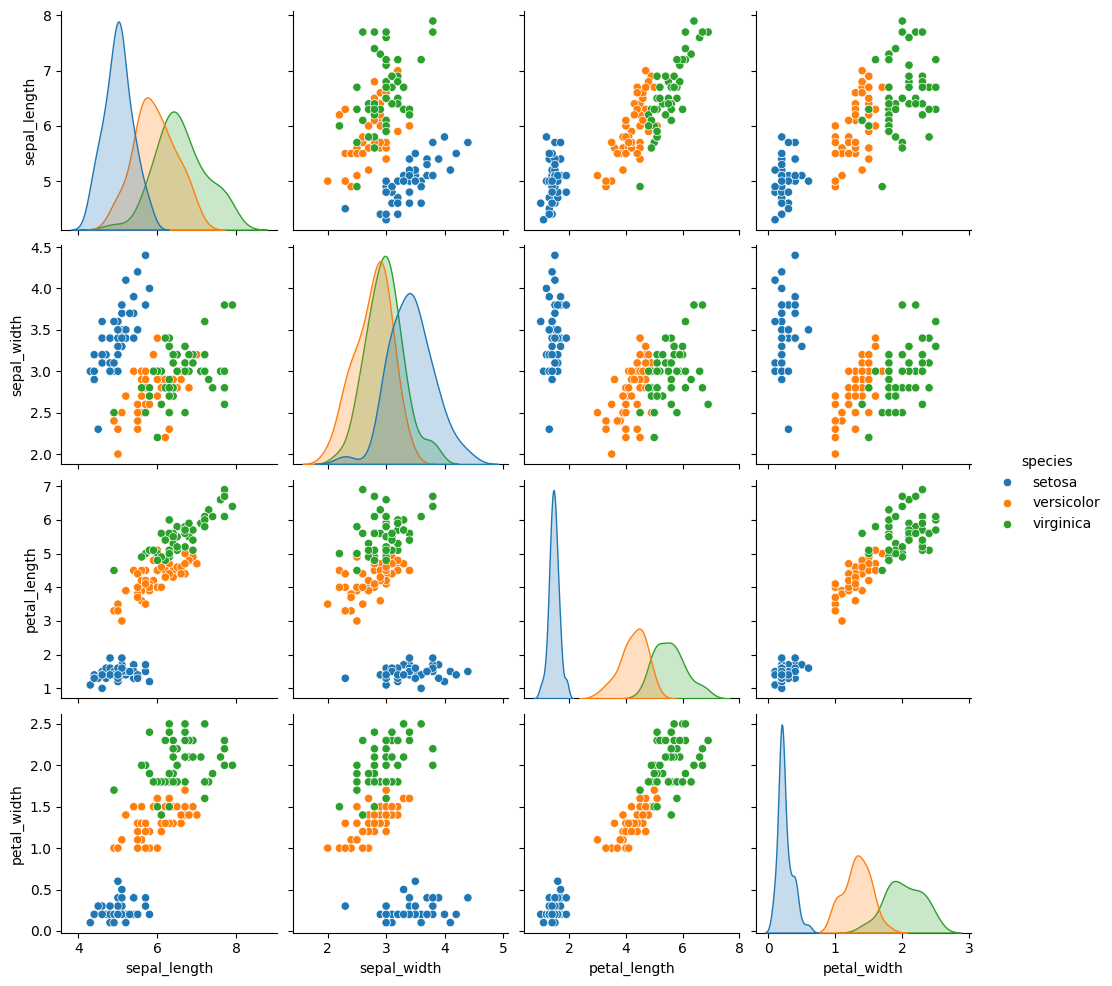

In [3]:
# Step 2: Data Visualization
# Pairplot to visualize the relationships between variables
sns.pairplot(iris, hue='species')
plt.show()

In [4]:
# Step 3: Data Preprocessing
# Encodeing the target labels to integers
label_encoder = LabelEncoder()
iris['species'] = label_encoder.fit_transform(iris['species'])

In [5]:
# Spliting the dataset into features (X) and labels (y)
X = iris.drop('species', axis=1)
y = iris['species']

In [6]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 4: Building the Model Using TensorFlow
# Building the model
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(3, activation='softmax')
])

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,091 (35.51 KB)

 Trainable params: 9,091 (35.51 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Step 5: Train the Model
# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=2)

Epoch 1/50
3/3 - 1s - 424ms/step - accuracy: 0.4688 - loss: 1.1975 - val_accuracy: 0.5000 - val_loss: 1.1451
Epoch 2/50
3/3 - 0s - 24ms/step - accuracy: 0.5208 - loss: 1.0605 - val_accuracy: 0.5417 - val_loss: 0.9463
Epoch 3/50
3/3 - 0s - 22ms/step - accuracy: 0.4167 - loss: 1.0115 - val_accuracy: 0.7083 - val_loss: 0.8974
Epoch 4/50
3/3 - 0s - 25ms/step - accuracy: 0.6354 - loss: 0.9309 - val_accuracy: 0.5000 - val_loss: 0.9339
Epoch 5/50
3/3 - 0s - 26ms/step - accuracy: 0.7188 - loss: 0.8816 - val_accuracy: 0.5000 - val_loss: 0.9447
Epoch 6/50
3/3 - 0s - 35ms/step - accuracy: 0.7188 - loss: 0.8414 - val_accuracy: 0.5000 - val_loss: 0.8624
Epoch 7/50
3/3 - 0s - 27ms/step - accuracy: 0.7188 - loss: 0.7842 - val_accuracy: 0.7500 - val_loss: 0.8015
Epoch 8/50
3/3 - 0s - 23ms/step - accuracy: 0.7604 - loss: 0.7511 - val_accuracy: 0.7083 - val_loss: 0.7371
Epoch 9/50
3/3 - 0s - 23ms/step - accuracy: 0.7083 - loss: 0.7107 - val_accuracy: 0.8750 - val_loss: 0.7079
Epoch 10/50
3/3 - 0s - 27ms

In [11]:
# Step 6: Evaluate the Model
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.1730
Test accuracy: 1.0000


In [12]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [13]:
# Compute and display evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [14]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



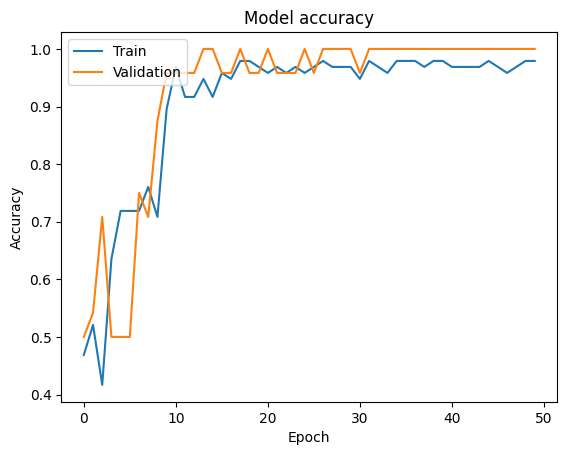

In [15]:
# Step 7: Visualize the Training Process
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

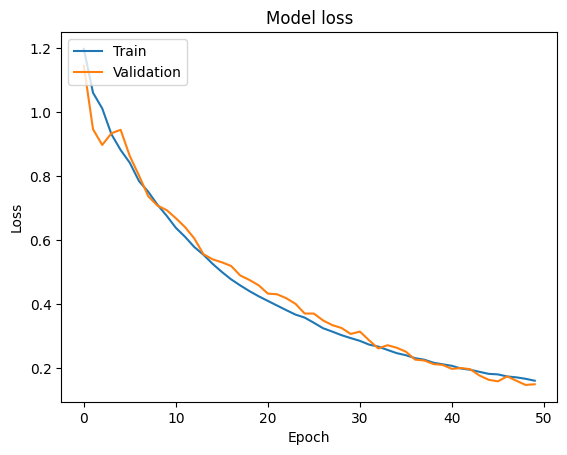

In [16]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()